In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [4]:
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os

from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.pyplot import cm 

In [38]:
estados_path = "/Users/claudiopierard/vc/datos/EstadosMX/"
estados_names = blt.nombres_estados
estados = {}
for i in estados_names:
    reg = blt.region()
    path = estados_path + i + ".xy"
    blt.read_region(reg, path)
    estados[i] = reg

In [5]:
xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")

In [8]:
path_2_datos_vc = "/Volumes/BUFFALO_SOLDIER/datos_VC/"

In [24]:
jan = h5py.File(path_2_datos_vc + "02/feb_24.h5", 'r')

In [25]:
vc_24 = np.array(jan.get('vc_24h'))
pblh_24 = np.array(jan.get('pblh_24h'))
u_mean_24 = np.array(jan.get('u_mean_24h'))
dates_24 = jan.get('dates_24h')

In [26]:
vc_24.shape

(28, 24, 102, 128)

In [27]:
pblh_24.shape

(28, 24, 102, 128)

In [30]:
dd, tt, ii, jj = pblh_24.shape

pblh_max_day = np.zeros((dd,ii,jj))
pblh_max_mean = np.zeros((ii,jj))

for d in range(0, dd):
    for i in range(0, ii):
        for j in range(0, jj):
            
            pblh_max_day[d,i,j] = np.max(pblh_24[d, : ,i, j])
            
for i in range(0, ii):
        for j in range(0, jj):
            pblh_max_mean[i,j] = np.mean(pblh_max_day[:,i,j])

In [32]:
pblh_max_mean.shape

(102, 128)

In [36]:
xlong[0,:]

array([-101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330566,
       -101.01330566, -101.01330566, -101.01330566, -101.01330

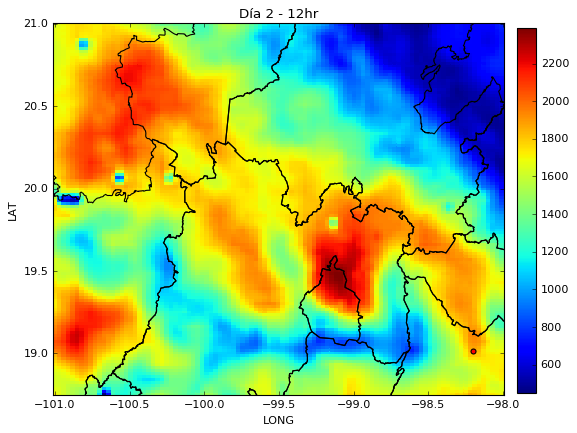

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(xlong[:,0].min(), xlong[:,0].max())
ax.set_ylim(xlat[0,:].min(), xlat[0,:].max())

d = 2
t = 12

im = ax.pcolormesh(xlong, xlat, pblh_max_mean)
ax.scatter(-98.198993, 19.012326, c = 'r')

for name in estados_names:
    ax.plot(estados[name].lon, estados[name].lat, c='k')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Día ' + str(d) +' - ' + str(t) + 'hr')